# Example 01 - Simple usage of PIVSuite Python

This example demonstrates the simplest possible use of PIVSuite Python for obtaining the velocity field from a pair of images.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add the parent directory to the path so we can import the pivsuite package
sys.path.append(str(Path().absolute().parent))

from pivsuite.core import analyze_image_pair, piv_params
from pivsuite.visualization import quiver_plot, vector_plot, streamline_plot
from pivsuite.utils.io import load_image

## Define paths to images

First, we need to define the paths to the images we want to analyze. We'll use the von Karman vortex street test case.

In [2]:
# Define paths to images
data_dir = Path().absolute().parent.parent / "Data" / "Test von Karman"
im1_path = str(data_dir / "PIVlab_Karman_01.bmp")
im2_path = str(data_dir / "PIVlab_Karman_02.bmp")
mask_path = str(data_dir / "PIVlab_Karman_mask.png")

# Check if the image files exist
if not os.path.exists(im1_path) or not os.path.exists(im2_path) or not os.path.exists(mask_path):
    print(f"Error: Image files not found. Please check the paths.")
else:
    print(f"Image paths:\n  {im1_path}\n  {im2_path}\n  Mask: {mask_path}")

Image paths:
  /home/user/Documents/repos/1pxPIV/Data/Test von Karman/PIVlab_Karman_01.bmp
  /home/user/Documents/repos/1pxPIV/Data/Test von Karman/PIVlab_Karman_02.bmp
  Mask: /home/user/Documents/repos/1pxPIV/Data/Test von Karman/PIVlab_Karman_mask.png


## Set PIV parameters

Next, we'll set the PIV parameters. We'll use the default parameters and just add the mask.

In [3]:
# Set PIV parameters
piv_par = {}

# Set mask for both images
piv_par['im_mask1'] = mask_path
piv_par['im_mask2'] = mask_path

# Get default parameters
piv_par = piv_params(None, piv_par, 'defaults')

# Create output directory if it doesn't exist
output_dir = Path().absolute().parent / "output"
output_dir.mkdir(exist_ok=True)

## Analyze image pair

Now we'll analyze the image pair using the PIVSuite Python package.

In [4]:
# Analyze image pair
print("Analyzing image pair...")
piv_data, _ = analyze_image_pair(im1_path, im2_path, None, piv_par)

# Print some statistics
print(f"Grid points: {piv_data['n']}")
print(f"Masked vectors: {piv_data['masked_n']}")
print(f"Spurious vectors: {piv_data['spurious_n']}")
print(f"Computational time: {sum(piv_data['comp_time']):.2f} seconds")

Analyzing image pair...


/home/user/Documents/repos/1pxPIV/Python/pivsuite/core/cross_corr.py:178: RuntimeWarning: invalid value encountered in log
  du = (np.log(cc_cor[v_px, u_px-1]) - np.log(cc_cor[v_px, u_px+1])) / \
/home/user/Documents/repos/1pxPIV/Python/pivsuite/core/cross_corr.py:179: RuntimeWarning: invalid value encountered in log
  (np.log(cc_cor[v_px, u_px-1]) + np.log(cc_cor[v_px, u_px+1]) - 2*np.log(cc_cor[v_px, u_px])) / 2


Pass 1/2 completed in 1.36 seconds


/home/user/Documents/repos/1pxPIV/Python/pivsuite/core/cross_corr.py:181: RuntimeWarning: invalid value encountered in log
  dv = (np.log(cc_cor[v_px-1, u_px]) - np.log(cc_cor[v_px+1, u_px])) / \
/home/user/Documents/repos/1pxPIV/Python/pivsuite/core/cross_corr.py:182: RuntimeWarning: invalid value encountered in log
  (np.log(cc_cor[v_px-1, u_px]) + np.log(cc_cor[v_px+1, u_px]) - 2*np.log(cc_cor[v_px, u_px])) / 2


Pass 2/2 completed in 3.04 seconds
Grid points: 11938
Masked vectors: 0
Spurious vectors: 11938
Computational time: 4.40 seconds


## Visualize results

Now we'll visualize the results using the PIVSuite visualization functions.

Creating quiver plot...


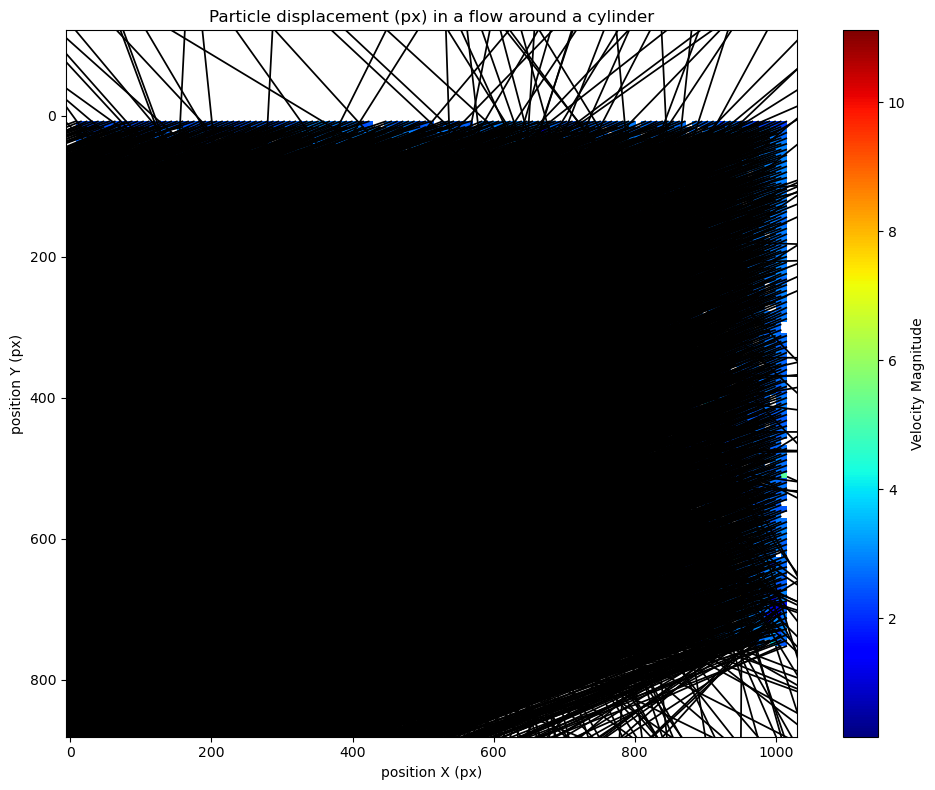

In [5]:
# Load the first image for background
im1 = load_image(im1_path)

# Create quiver plot with velocity magnitude background
print("Creating quiver plot...")
fig1 = quiver_plot(
    piv_data,
    scale=1.0,
    color='k',
    background='magnitude',
    title='Particle displacement (px) in a flow around a cylinder',
    output_path=str(output_dir / "example01_quiver_plot.png"),
    show=True,
    xlabel='position X (px)',
    ylabel='position Y (px)'
)

## Create a cropped quiver plot

Let's create a cropped quiver plot to show details around the cylinder.

Creating cropped quiver plot...


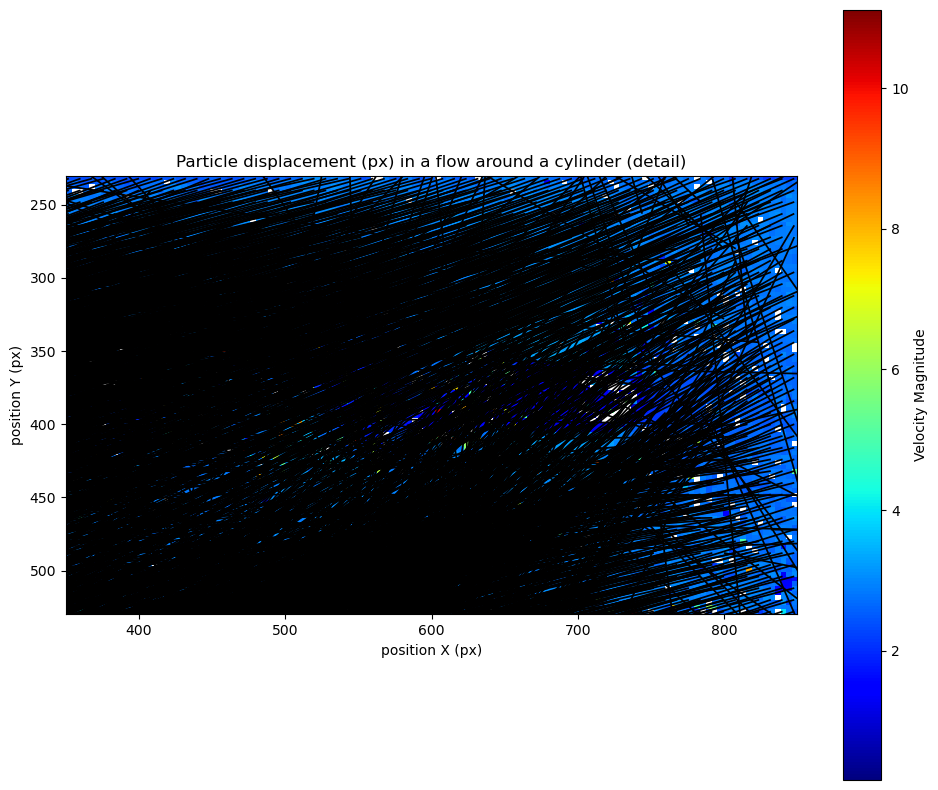

In [6]:
# Create a cropped quiver plot showing details around the cylinder
print("Creating cropped quiver plot...")
fig2 = quiver_plot(
    piv_data,
    scale=1.0,
    color='k',
    background='magnitude',
    title='Particle displacement (px) in a flow around a cylinder (detail)',
    output_path=str(output_dir / "example01_quiver_plot_detail.png"),
    show=True,
    crop=[350, 850, 230, 530],
    xlabel='position X (px)',
    ylabel='position Y (px)'
)

## Extract velocity profile

Let's extract a velocity profile at X = 550 px.

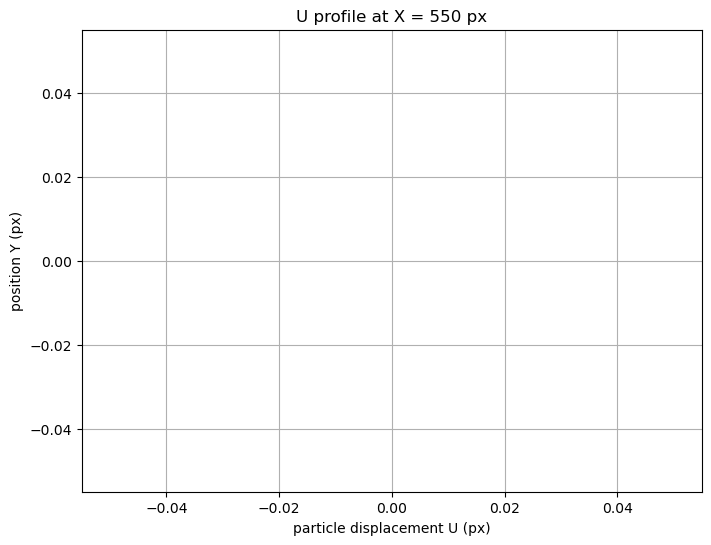

In [7]:
# Extract data for velocity profile
# Interpolate data for desired position
y = np.arange(230, 531)
x = np.ones_like(y) * 550

# Get the grid data
X = piv_data['x']
Y = piv_data['y']
U = piv_data['u']

# Interpolate U values at the specified points
from scipy.interpolate import griddata
u_interp = griddata((X.flatten(), Y.flatten()), U.flatten(), (x, y), method='cubic')

# Plot velocity profile
plt.figure(figsize=(8, 6))
plt.plot(u_interp, y, '-b')
plt.title('U profile at X = 550 px')
plt.xlabel('particle displacement U (px)')
plt.ylabel('position Y (px)')
plt.grid(True)
plt.savefig(str(output_dir / "example01_velocity_profile.png"))
plt.show()

## Conclusion

In this example, we've demonstrated the simplest possible use of PIVSuite Python for obtaining the velocity field from a pair of images. We've shown how to:

1. Set up the PIV parameters
2. Analyze an image pair
3. Visualize the results with quiver plots
4. Extract and plot a velocity profile

All plots have been saved to the output directory.